# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Dermatology dataset

In [2]:
Xy = pd.read_csv('./datasets/dermatology.csv')

X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.918918918918919, 0.9054054054054054, 0.8513513513513513, 0.8918918918918919, 0.8918918918918919, 0.8648648648648649, 0.918918918918919, 0.9324324324324325, 0.9054054054054054, 0.8783783783783784, 0.8783783783783784, 0.8513513513513513, 0.9054054054054054, 0.918918918918919, 0.7972972972972973, 0.8648648648648649, 0.8783783783783784, 0.8378378378378378, 0.918918918918919, 0.918918918918919]

Accuracy:
0.8864864864864866

Standard Deviation:
0.03348516673882128

Confusion Matrix:
   5   1  6   3  2  4
5  9   0  0   0  0  2
1  0  22  1   0  0  0
6  0   0  3   0  0  0
3  0   0  0  17  0  0
2  0   0  0   0  9  1
4  1   0  0   0  1  8
    2   3   1   4   5  6
2  10   0   0   3   0  0
3   0  12   0   0   0  0
1   0   0  22   0   0  0
4   2   0   0  10   0  0
5   1   0   0   1  10  0
6   0   0   0   0   0  3
    2  4   3   1  5  6
2  11  5   0   0  0  0
4   2  5   0   0  1  0
3   0  0  18   0  0  0
1   0  1   0  17  0  1
5   0  0   0  

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,5,1,6,3,2,4
5,9,0,0,0,0,0
1,0,20,0,0,0,0
6,0,0,3,0,0,0
3,0,0,0,14,0,0
2,0,0,0,0,9,2
4,0,0,0,0,1,8


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.47297297297297297, 0.5675675675675675, 0.5675675675675675, 0.5540540540540541, 0.5, 0.6216216216216216, 0.6351351351351351, 0.4864864864864865, 0.6216216216216216, 0.47297297297297297, 0.4594594594594595, 0.4864864864864865, 0.581081081081081, 0.5, 0.527027027027027, 0.35135135135135137, 0.5, 0.527027027027027, 0.5405405405405406, 0.5405405405405406]

Accuracy:
0.5256756756756756

Standard Deviation:
0.0646533714265172

Confusion Matrix:
   5   1  6   3  2  4
5  5   1  3   0  0  2
1  0  10  5   0  1  7
6  0   0  3   0  0  0
3  0   1  0  12  1  3
2  1   5  1   0  2  1
4  1   3  2   0  1  3
   2   3   1  4  5  6
2  6   4   0  0  0  3
3  0  10   0  0  0  2
1  1   0  17  0  0  4
4  5   2   0  3  0  2
5  5   0   2  0  3  2
6  0   0   0  0  0  3
   2  4   3   1  5  6
2  2  4   0   5  0  5
4  0  4   0   3  0  1
3  0  3  15   0  0  0
1  1  3   0  12  0  3
5  0  1   0   1  5  2
6  0  0   0   0  0  4
   4   1   3  2  5  6
4  3   1   0  5

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,5,1,6,3,2,4
5,3,1,2,0,1,0
1,0,12,3,0,2,1
6,0,0,4,0,0,0
3,0,0,0,10,1,1
2,0,2,2,1,4,1
4,0,1,2,1,1,4


# Showing bayes informations computed

In [9]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.47297297297297297, 0.5675675675675675, 0.5675675675675675, 0.5540540540540541, 0.5, 0.6216216216216216, 0.6351351351351351, 0.4864864864864865, 0.6216216216216216, 0.47297297297297297, 0.4594594594594595, 0.4864864864864865, 0.581081081081081, 0.5, 0.527027027027027, 0.35135135135135137, 0.5, 0.527027027027027, 0.5405405405405406, 0.5405405405405406]

Accuracy:
0.5256756756756756

Standard Deviation:
0.0646533714265172

Confusion Matrix:
   5   1  6   3  2  4
5  5   1  3   0  0  2
1  0  10  5   0  1  7
6  0   0  3   0  0  0
3  0   1  0  12  1  3
2  1   5  1   0  2  1
4  1   3  2   0  1  3
   2   3   1  4  5  6
2  6   4   0  0  0  3
3  0  10   0  0  0  2
1  1   0  17  0  0  4
4  5   2   0  3  0  2
5  5   0   2  0  3  2
6  0   0   0  0  0  3
   2  4   3   1  5  6
2  2  4   0   5  0  5
4  0  4   0   3  0  1
3  0  3  15   0  0  0
1  1  3   0  12  0  3
5  0  1   0   1  5  2
6  0  0   0   0  0  4
   4   1   3  2  5  6
4  3   

In [10]:
confusion_matrix_mean(b_confusion_matrix_list)

,5,1,6,3,2,4
5,3,1,2,0,1,0
1,0,12,3,0,2,1
6,0,0,4,0,0,0
3,0,0,0,10,1,1
2,0,2,2,1,4,1
4,0,1,2,1,1,4


# Choosing two columns from the last X_train and X_test to plot decision surface

In [11]:
X_train_2d, X_test_2d = X_train[['erythema', 'scaling']], X_test[['erythema', 'scaling']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     erythema  scaling
21          3        2
245         3        3
269         3        2
213         2        2
203         1        1
..        ...      ...
272         3        3
339         2        1
356         2        2
347         2        2
344         2        2

[292 rows x 2 columns]
Test dataset:
     erythema  scaling
161         2        1
8           2        2
281         2        2
84          1        1
109         3        2
..        ...      ...
229         2        2
291         2        2
177         2        2
121         2        2
228         2        1

[74 rows x 2 columns]


# Training the models with the new dataset 2d

In [12]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

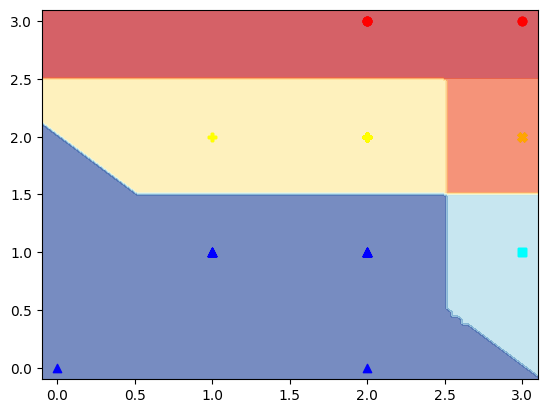

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)
four = np.where(knn_y_pred == 4)
five = np.where(knn_y_pred == 5)
six = np.where(knn_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting dmc decision surface

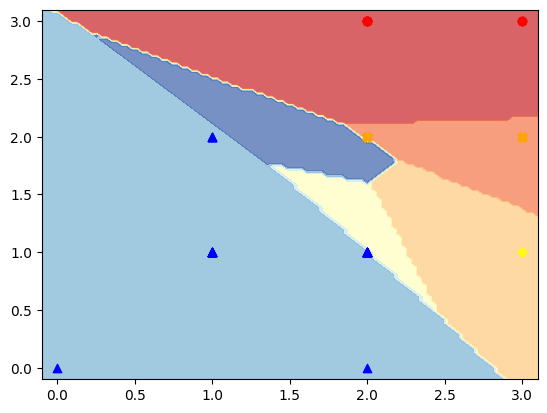

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)
four = np.where(dmc_y_pred == 4)
five = np.where(dmc_y_pred == 5)
six = np.where(dmc_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting bayes decision surface

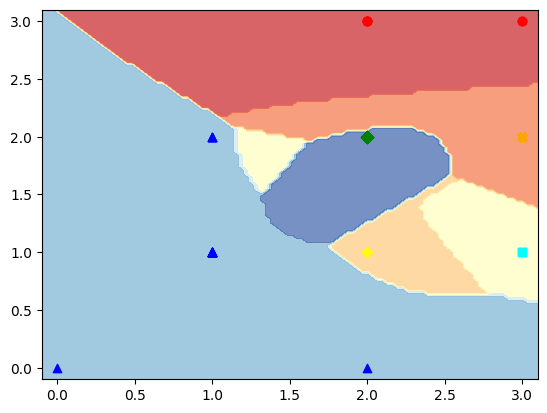

In [16]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

one = np.where(b_y_pred == 1)
two = np.where(b_y_pred == 2)
three = np.where(b_y_pred == 3)
four = np.where(b_y_pred == 4)
five = np.where(b_y_pred == 5)
six = np.where(b_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()